# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1059]:
import numpy as np
np.random.seed(42)

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [1355]:
x = np.array([10,2,0,5,7,0])

In [1356]:
def max_element(arr):
    a = np.insert(arr==0, 0, False)[:-1]
    if sum(a)>0:
        return(np.max(arr[a]))
    else:
        return None

In [1357]:
max_element(x)

5

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [1063]:
X = np.arange(0,10).reshape((2, 5))

In [1064]:
def nearest_value(X, v):
    return X.item(np.abs(X-v).argmin())

In [1065]:
nearest_value(X, 3.6)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [1066]:
X = np.random.randint(4, size=(3, 4))
X

array([[2, 3, 0, 2],
       [2, 3, 0, 0],
       [2, 1, 2, 2]])

In [1067]:
def scale(X):
    return np.divide(X-np.mean(X, axis=0), np.std(X, axis=0), where=[np.std(X, axis=0)!=0] )

In [1068]:
scale(X)

array([[ 0.        ,  0.70710678, -0.70710678,  0.70710678],
       [ 0.        ,  0.70710678, -0.70710678, -1.41421356],
       [ 0.        , -1.41421356,  1.41421356,  0.70710678]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [1069]:
X = np.random.normal(10, 1, size=(3, 3)) 
X

array([[ 11.57921282,  10.76743473,   9.53052561],
       [ 10.54256004,   9.53658231,   9.53427025],
       [ 10.24196227,   8.08671976,   8.27508217]])

In [1070]:
def get_stats(X):
    return {'det': np.linalg.det(X), 'trace': np.trace(X), 'min-max': (np.min(X),np.max(X)),
            'norm': np.linalg.norm(X), 'eigvals': np.linalg.eigvals(X), 'inv': np.linalg.inv(X)}

In [1071]:
get_stats(X)

{'det': 14.740107723974615,
 'eigvals': array([ 29.51174417+0.j        ,  -0.06043344+0.70414035j,
         -0.06043344-0.70414035j]),
 'inv': array([[ 0.12313551, -0.81618924,  0.79856883],
        [ 0.70617432, -0.12159655, -0.67321121],
        [-0.84250318,  1.12901558, -0.20964644]]),
 'min-max': (8.0867197553422017, 11.579212815507391),
 'norm': 29.539987043198693,
 'trace': 29.390877290181894}

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [1072]:
gen = [np.max(np.dot(np.random.normal(size=(10, 10)), np.random.normal(size=(10, 10)))) for exp_num in range(100)] 

In [1073]:
print('Mean is:', np.mean(gen), '\n95-percentile is:', 
np.percentile(gen, 95, interpolation='nearest'))

Mean is: 8.43363660657 
95-percentile is: 11.6041187631


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1074]:
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('2008.csv')
print(data.shape)
data.head()

(70000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [1075]:
print(sum(data.isnull().sum()), 'пропущенных элементов в таблице объект-признак')

355215 пропущенных элементов в таблице объект-признак


In [1076]:
print(sum(data.isnull().sum(axis=0) > 0), 'Признаков имеют хотя бы одно пропущенное значение')

16 Признаков имеют хотя бы одно пропущенное значение


In [1077]:
print(sum(data.isnull().sum(axis=1) > 0), 'Объектов имеют хотя бы один пропуск')

70000 Объектов имеют хотя бы один пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [1078]:
print(data['DepDelay'].isnull().sum(), 'пропущенных значений в целевой переменной')

1399 пропущенных значений в целевой переменной


Посмотрим на объекты, у которых нет ответа, заметим, что у этих объектов в признаке Cancelled единицы, проверим, так ли это для всех объектов:

In [1079]:
sum(data[data['DepDelay'].isnull()]['Cancelled'] < 1)

0

Дествительно, все объекты с отсутствующим ответом были отменены, проверим, работает ли это в обратную сторону

In [1080]:
data[(data['DepDelay'].isnull()==False) & (data['Cancelled']==1)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5976,2008,11,29,6,1325.0,1301,NaN,1354,EV,5401,N636AS,NaN,53.0,NaN,NaN,24.0,ATL,AGS,143,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
15680,2008,12,19,5,954.0,935,NaN,1252,XE,2573,N21537,NaN,137.0,NaN,NaN,19.0,BNA,EWR,748,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
16382,2008,12,6,6,1806.0,1728,NaN,1827,OO,5790,N288SW,NaN,59.0,NaN,NaN,38.0,SFO,CIC,153,NaN,11.0,1,B,0,NaN,NaN,NaN,NaN,NaN
20622,2008,10,7,2,844.0,845,NaN,1039,YV,7302,N505MJ,NaN,114.0,NaN,NaN,-1.0,IAD,JAX,631,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
22462,2008,12,17,3,2132.0,2134,NaN,2232,YV,2859,N17231,NaN,58.0,NaN,NaN,-2.0,PHX,FLG,119,NaN,28.0,1,B,0,NaN,NaN,NaN,NaN,NaN
30057,2008,12,9,2,1358.0,1330,NaN,1700,OO,2874,N506CA,NaN,150.0,NaN,NaN,28.0,MKE,EWR,725,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
33611,2008,10,11,6,826.0,830,NaN,1015,OO,3721,N437SW,NaN,165.0,NaN,NaN,-4.0,MCI,SLC,919,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
37581,2008,12,3,3,2234.0,2235,NaN,2318,OO,5426,N560SW,NaN,43.0,NaN,NaN,-1.0,SFO,SMF,86,NaN,16.0,1,B,0,NaN,NaN,NaN,NaN,NaN
40343,2008,11,10,1,1440.0,1445,NaN,1731,EV,5309,N921EV,NaN,106.0,NaN,NaN,-5.0,SGF,ATL,563,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
50401,2008,11,29,6,2232.0,2234,NaN,11,OO,6412,N750SK,NaN,97.0,NaN,NaN,-2.0,SFO,EUG,451,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN


Для 12 объектов не выполнено обратное, то есть они были отменены, но вылетели из аэропорта, при этом они не прилетели, так как ArrDelay = NaN, но они и не были перенаправлены в другой аэропорт, а ActualElapsedTime - время от поднятия шасси до реального приземления неизвестно. Значит, их сбили (как только они подняли шасси). Но даже если это ошибки в данных, то признак Cancelled можно удалить, так как он будет иметь 12 единиц с учетом удаления оъектов без ответа, это не будет информативным

__Вывод: удаляем Cancelled = 1__

In [1081]:
data.drop(['Cancelled','CancellationCode'], axis=1, inplace=True)

In [1082]:
data_1 = data[(data['DepDelay'].isnull()==False) & (data['DepDelay']!=0)]

In [1083]:
data_1.shape

(63404, 27)

In [1084]:
data_x = data_1[data_1.columns.difference(['DepDelay'])]

In [1085]:
data_x.shape

(63404, 26)

In [1086]:
data_y  = data_1['DepDelay']

In [1087]:
data_y.shape

(63404,)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [1088]:
for col in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    data_x[col+'_Hour'] = data_x[col]//100
    data_x[col+'_Minute'] = data_x[col]%100
    data_x.drop([col], axis=1, inplace=True)

In [1089]:
data_x.head()

,ActualElapsedTime,AirTime,ArrDelay,CRSElapsedTime,CarrierDelay,DayOfWeek,DayofMonth,Dest,Distance,Diverted,FlightNum,LateAircraftDelay,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,57.0,46.0,8.0,65.0,NaN,3,18,CLE,307,0,242,NaN,6,NaN,MDW,NaN,N699SW,3.0,8.0,WN,NaN,2008,21.0,11.0,20,55,23.0,8.0,23,0
1,124.0,108.0,2.0,138.0,NaN,3,4,AVL,834,0,2380,NaN,6,NaN,IAH,NaN,N15980,4.0,12.0,XE,NaN,2008,14.0,26.0,14,10,17.0,30.0,17,28
2,138.0,125.0,-19.0,155.0,NaN,7,3,TPA,997,0,1769,NaN,8,NaN,MDW,NaN,N464WN,4.0,9.0,WN,NaN,2008,11.0,43.0,11,45,15.0,1.0,15,20
3,102.0,79.0,-12.0,111.0,NaN,3,23,FCA,532,0,3802,NaN,1,NaN,SLC,NaN,N465SW,4.0,19.0,OO,NaN,2008,11.0,41.0,11,44,13.0,23.0,13,35
4,148.0,136.0,-17.0,160.0,NaN,7,4,AUS,1090,0,399,NaN,5,NaN,LAS,NaN,N489WN,4.0,8.0,WN,NaN,2008,8.0,15.0,8,20,12.0,43.0,13,0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Посмотрим, какие признаки сильно коррелируют с целевой переменной

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


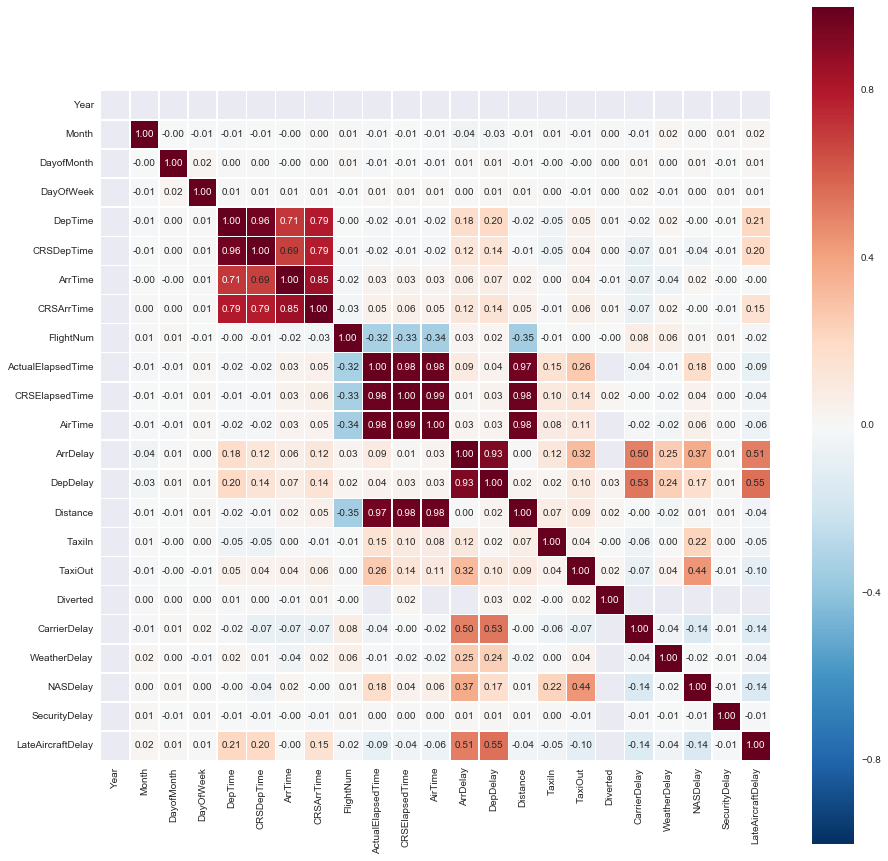

In [1090]:
%pylab inline
import seaborn as sns
corr = data_1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, linewidths=.5,  ax=ax)

Наиболее сильно кореелирующие признаки

In [1091]:
corr_DepDelay = corr.loc['DepDelay',:]
corr_DepDelay[corr_DepDelay > 0.4]

ArrDelay             0.933526
DepDelay             1.000000
CarrierDelay         0.532696
LateAircraftDelay    0.553806
Name: DepDelay, dtype: float64

Посмотрим на таймлайн переменных

<img src="timeline.png" width="600" height="600">

[Источник](http://www.galitshmueli.com/sites/galitshmueli.com/files/FlightDelays.pdf)

In [1092]:
data_1[(data_1['TaxiOut']> data_1['DepDelay']) & (data_1['DepDelay']>0)][['DepDelay', 'TaxiOut', 'DepTime',
                                                                          'CRSDepTime']].head()

,DepDelay,TaxiOut,DepTime,CRSDepTime
17,1.0,65.0,1951.0,1950
25,1.0,10.0,901.0,900
43,8.0,19.0,648.0,640
44,5.0,13.0,1735.0,1730
51,14.0,46.0,1416.0,1402


Но по нашим данным TaxiOut не входит DepDelay, получается, что в нашем случае DepDelay = DepTime - CRSDepTime

Логично предположить, что в момент предсказания мы находимся до вылета самолета и не знаем ни информацию после взлета, ни информацию о времени реального отправления - только расписание (иначе модель бессмысленна) 

Очевидно, что все переменные после __Wheels-off time__ мы не можем использовать, так как они не известны в момент нашего предсказания или не влияют на нашу переменную. 
- ActualElapsedTime - после вылета
- CRSElapsedTime - не влияет
- AirTime - после вылета
- ArrDelay - после вылета
- Year - не нужен 
- ArrTime_Hour - после вылета
- ArrTime_Minute - после вылета
- TaxiIn - после вылета
- TailNum - не нужен 
- LateAircraftDelay - не можем знать до того, как произошло 
- WeatherDelay - не можем знать до того, как произошло 
- CarrierDelay - не можем знать до того, как произошло 
- Diverted - узнается в процессе полета и не влияет на задержку при вылете
- NASDelay - не можем знать до того, как произошло 
- SecurityDelay - не можем знать до того, как произошло 
- TaxiOut - по данным происходит после задержки, так что не влияет на DepDelay
- DepTime_Hour - не можем знать до того, как произошло 
- DepTime_Minute - не можем знать до того, как произошло
- ArrTime_Hour - не можем знать до того, как произошло
- ArrTime_Minute - не можем знать до того, как произошло

Получаем данные:

In [1093]:
X = data_x[['DayOfWeek', 'DayofMonth', 'Dest', 'Distance',  'FlightNum', 'Month', 'Origin','UniqueCarrier',
            'CRSDepTime_Hour', 'CRSDepTime_Minute','CRSArrTime_Hour','CRSArrTime_Minute']]

In [1094]:
X.head()

,DayOfWeek,DayofMonth,Dest,Distance,FlightNum,Month,Origin,UniqueCarrier,CRSDepTime_Hour,CRSDepTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,3,18,CLE,307,242,6,MDW,WN,20,55,23,0
1,3,4,AVL,834,2380,6,IAH,XE,14,10,17,28
2,7,3,TPA,997,1769,8,MDW,WN,11,45,15,20
3,3,23,FCA,532,3802,1,SLC,OO,11,44,13,35
4,7,4,AUS,1090,399,5,LAS,WN,8,20,13,0


Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

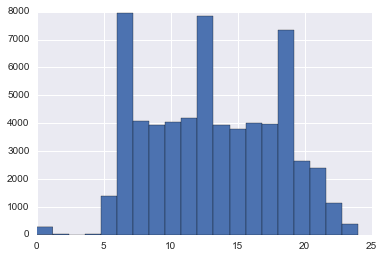

In [1095]:
data_x['DepTime_Hour'].hist(bins=20)

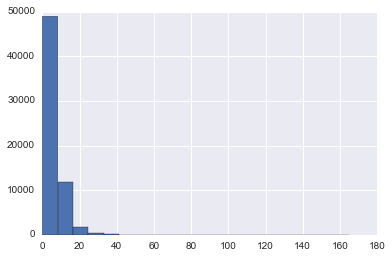

In [1096]:
data_x['TaxiIn'].hist(bins=20)

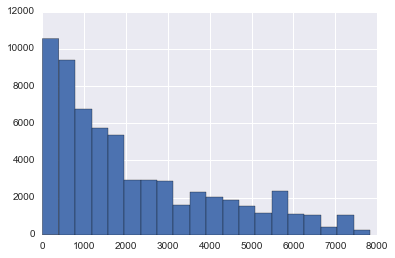

In [1097]:
data_x['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Проблема - разные единицы измерения, следовательно разный разброс переменных, поэтому без масштабирования их нельзя сравнивать. Кроме того, это нужно для градиентного спуска, который мы будем использовать для обучения. Если признаки имеют разный масштаб, то на разных признаках веса будут обновляться с разной скоростью. Масштабирование ускорит сходимость алгоритма. 

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [1098]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 15)

In [1099]:
def transform_data(data):
    ss = StandardScaler()
    for col in data.columns:
        if data[col].dtype.name == 'object':
            data[col].fillna('nan', inplace = True)
        else:
            data[col].fillna(0, inplace = True)
            data[col]= ss.fit_transform(data[col].reshape(-1, 1)).flatten('F')
    data = pd.get_dummies(data)
    return data 

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [1100]:
X_trasf = transform_data(X)

In [1101]:
print(X_trasf.shape[1], "признака после преобразования")

623 признака после преобразования


In [1102]:
X_trasf.head()

,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,-0.462767,0.256485,-0.744130,-0.991600,-0.118281,1.512432,1.586498,...,0,0,0,0,1,0,0
1,-0.462767,-1.332050,0.183961,0.106546,-0.118281,0.214011,-0.936014,...,0,0,0,0,0,1,0
2,1.541454,-1.445517,0.471018,-0.207284,0.467662,-0.435199,1.025940,...,0,0,0,0,1,0,0
3,-0.462767,0.823819,-0.347886,0.836931,-1.583137,-0.435199,0.969884,...,0,1,0,0,0,0,0
4,1.541454,-1.332050,0.634799,-0.910960,-0.411252,-1.084410,-0.375456,...,0,0,0,0,1,0,0


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [1124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trasf, data_y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [1108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [1125]:
X_train_2, y_train_2 = X_train[:1000], y_train[:1000]
LinReg = LinearRegression()
LinReg.fit(X_train_2, y_train_2)
pr_train_LinReg = LinReg.predict(X_train_2)
pr_test_LinReg = LinReg.predict(X_test)

In [1126]:
print('-------Train-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_train_2, pr_train_LinReg), r2_score(y_train_2, pr_train_LinReg)))
print('-------Test-------')
print('MSE %0.4f \nR2    %0.4f ' %(mse(y_test, pr_test_LinReg), r2_score(y_test, pr_test_LinReg)))

-------Train-------
MSE 690.8611 
R2    0.3481 
-------Test-------
MSE 643673939059818729832448.0000 
R2    -481190755444168654848.0000 


In [1127]:
LinReg.coef_

array([  8.70810082e-01,   6.58980797e-01,   6.08631627e-01,
         8.34016077e-01,  -5.55646737e-01,   7.73400703e+00,
        -9.42995467e-01,  -1.06896116e+00,   2.55544851e+00,
        -2.37168089e+12,  -2.37168089e+12,  -2.37168089e+12,
         4.45493607e+12,  -2.99372613e+13,   2.32651013e+12,
        -2.37168089e+12,  -1.45019066e+13,   4.50414295e+12,
        -9.31172014e+12,  -2.37168089e+12,  -3.08358902e+12,
        -8.90061311e+12,  -2.37168089e+12,  -2.37168089e+12,
        -2.37168089e+12,   4.70174117e+12,  -2.37168089e+12,
        -2.37168089e+12,  -2.37168089e+12,   6.07882902e+11,
         1.80147175e+12,  -2.37168089e+12,  -2.37168089e+12,
         5.37747455e+12,  -2.37168089e+12,  -1.44188278e+13,
        -3.89560828e+12,  -2.37168089e+12,  -5.65322004e+11,
        -2.37168089e+12,  -5.33439629e+12,   9.16378298e+09,
        -2.37168089e+12,  -2.37168089e+12,  -2.37168089e+12,
        -2.37168089e+12,  -2.84061955e+12,  -2.37168089e+12,
         2.57830489e+12,

__ВЫВОД:__

На тестовой выборке получили огромную MSE и сильно отрицательный $R^2$. Метрика r2_score может быть отрицательной, так как модель может быть "сколь угодно плоха" - в сравнении с моделью с одной константой, что дает $R^2$ = 0. То есть наша модель хуже предсказания среднего значения. Возможно, среднее тестовой выборки сильно отличается от среднего на обучающей, поэтому  просто предсказание среднего тестовой выборки намного лучше, то есть ошибка намного меньше, чем у нашей модели. 

Если модель адекватно работает на тренировочной, но хуже, чем бесполезна на тестовой, это значит, что существует проблема переобучения. Об этом свидетельствую экстремальные веса в модели - при таком большом количестве признаков модель теряет обобщающую способность, так как подстраивается под тренировочные данные, минимизируюя на них MSE, при этом коэффициенты в основном очень большие. 

Регуляризация как раз вводит штраф за большие веса модели, тем самым заставляя её меньше подстраиваться под тренировочные данные и сохранять обобщающую способность. 

------------------

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [1027]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

In [1044]:
LassReg = LassoCV(alphas=np.linspace(0.01, 100, num=1000), cv=KFold(n_splits=5,random_state=42))
LassReg.fit(X_train_2, y_train_2)
pr_train_LassReg = LassReg.predict(X_train_2)
pr_test_LassReg = LassReg.predict(X_test)

In [1045]:
LassReg.coef_

array([ 0.        ,  0.14977813,  0.73600924,  0.11622887, -0.6530681 ,
        5.44399428,  0.        ,  0.        ,  1.06151939,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

In [1161]:
LassReg.alpha_

0.41036036036036033

In [1046]:
print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_LassReg), r2_score(y_train_2, pr_train_LassReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_LassReg), r2_score(y_test, pr_test_LassReg)))

-------Train-------
MSE 1006.7691 
R2    0.0501 
-------Test-------
MSE 1316.3999 
R2    0.0159 


In [1157]:
RidgeReg = RidgeCV(alphas=np.linspace(0.01, 150, num=100), cv=KFold(n_splits=5,random_state=42))
RidgeReg.fit(X_train_2, y_train_2)
pr_train_RidgeReg = RidgeReg.predict(X_train_2)
pr_test_RidgeReg = RidgeReg.predict(X_test)

In [1158]:
RidgeReg.coef_

array([  2.12532400e-01,   5.64604054e-01,   1.14281567e+00,
         4.79208763e-01,  -9.14402180e-01,   4.82606226e+00,
        -1.82435175e-02,   7.46580505e-01,   1.30860125e+00,
         8.79407046e-01,  -1.53591809e-01,  -1.83568173e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -3.13300320e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -1.12459251e-01,   0.00000000e+00,
         0.00000000e+00,   6.95170110e-02,  -7.04885037e-02,
         1.49167447e-01,   0.00000000e+00,   1.64111891e+00,
        -4.03550007e-01,  -1.54884545e-01,   0.00000000e+00,
         0.00000000e+00,  -9.05179407e-02,  -6.75599475e-01,
         0.00000000e+00,  -1.85222488e-01,   0.00000000e+00,
         0.00000000e+00,  -1.24331712e-01,   0.00000000e+00,
         1.52102524e-01,   0.00000000e+00,   0.00000000e+00,
        -2.91577155e-02,  -4.44932423e-01,   9.80666155e-02,
         1.95595504e+00,   0.00000000e+00,  -1.83877373e-01,
         0.00000000e+00,

In [1160]:
RidgeReg.alpha_

116.6688888888889

In [1159]:
print('-------Train-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_train_2, pr_train_RidgeReg), r2_score(y_train_2, pr_train_RidgeReg)))
print('-------Test-------')
print('MSE %0.4f \nR2     %0.4f ' %(mse(y_test, pr_test_RidgeReg), r2_score(y_test, pr_test_RidgeReg)))

-------Train-------
MSE 971.6110 
R2     0.0832 
-------Test-------
MSE 1307.2449 
R2     0.0227 


__ВЫВОД:__

На тестовой выборке обе модели показали более высокую MSE и существенно более низкий $R^2$, однако на тестовой выборке MSE в обоих случаях улучшилась, при этом $R^2$ стал положительный, хотя и близкий к 0. Можно сделать вывод, что хотя модель и оставется бесполезной, уже нельзя сказать, что она хуже модели с константой (предсказания среднего). При этом и на тренировочной и на тестовой Ridge показывает себя немного лучше. 

Если посмотреть на веса, то можно увидеть, что Lasso занулила почти коэффициенты почти при всех признаках, кроме нескольких (отобрала признаки), а RidgeReg стянула к 0 все коэффициенты, не давая модели тем самым переобучаться так сильно. 

------------------

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [1316]:
X_train['C'] = 1
X_test['C'] = 1

In [1055]:
X_train.head()

,DayOfWeek,DayofMonth,Distance,FlightNum,Month,CRSDepTime_Hour,CRSDepTime_Minute,...,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,C
47629,1.541454,-0.310849,1.066264,0.136336,0.174690,-0.651603,-0.655735,...,0,0,0,1,0,0,1
39632,1.541454,-1.218584,-0.391913,2.143612,1.053604,-0.651603,1.025940,...,0,0,0,0,0,0,1
46373,0.038288,-0.651249,-0.659598,1.822592,-1.583137,0.646818,-0.375456,...,0,0,0,0,0,0,1
42942,0.038288,0.710352,2.557903,-1.110249,-0.411252,-0.435199,-0.543623,...,0,0,0,0,0,0,1
44966,-0.963823,1.618087,0.442841,-0.590453,1.639547,1.079625,-1.440516,...,0,0,0,0,0,0,1


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [1390]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)

In [1391]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]

In [1392]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    l1 = (y-make_pred(X, w))/y
    L = np.dot(X.T, l1/y)
    return -2*L/y.shape[0]

In [1393]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    Li = (y-make_pred(X, w))/y
    return np.dot(Li,Li)/y.shape[0]+np.dot(w,w)

In [1394]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    l1 = (y-make_pred(X, w))/y
    L = np.dot(X.T, l1/y)
    return -2*L/y.shape[0] + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [1238]:
def grad_descent(X, y, w0, step_size, max_iter=1000, eps=0.0001, is_reg=False):
    w_old, w_new = w0, w0
    L = [get_reg_func(w_old, X, y)] if is_reg else [get_func(w_old, X, y)]
    iteration = 0
    while iteration < max_iter and np.linalg.norm(w_old-w_new)>eps if iteration>0 else True:
        #print('iter=', iteration, 'L=', L[iteration], 'norm=', np.linalg.norm(w_old-w_new))
        w_old = w_new
        iteration += 1
        if is_reg:
            w_new = w_old - step_size*get_reg_grad(w_old, X, y)
            L.append(get_reg_func(w_new, X, y))
            
        else:
            w_new = w_old - step_size*get_grad(w_old, X, y)
            L.append(get_func(w_new, X, y))
    return w_new, L

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

Возьмем те же первые 1000 наблюдений для ускорения выполнения алгоритма и посмотрим на сходимость при разных параметрах:

In [1577]:
X_train_2, y_train_2 = X_train[:1000], y_train[:1000]
w0rand = numpy.random.rand(X_train_2.shape[1])

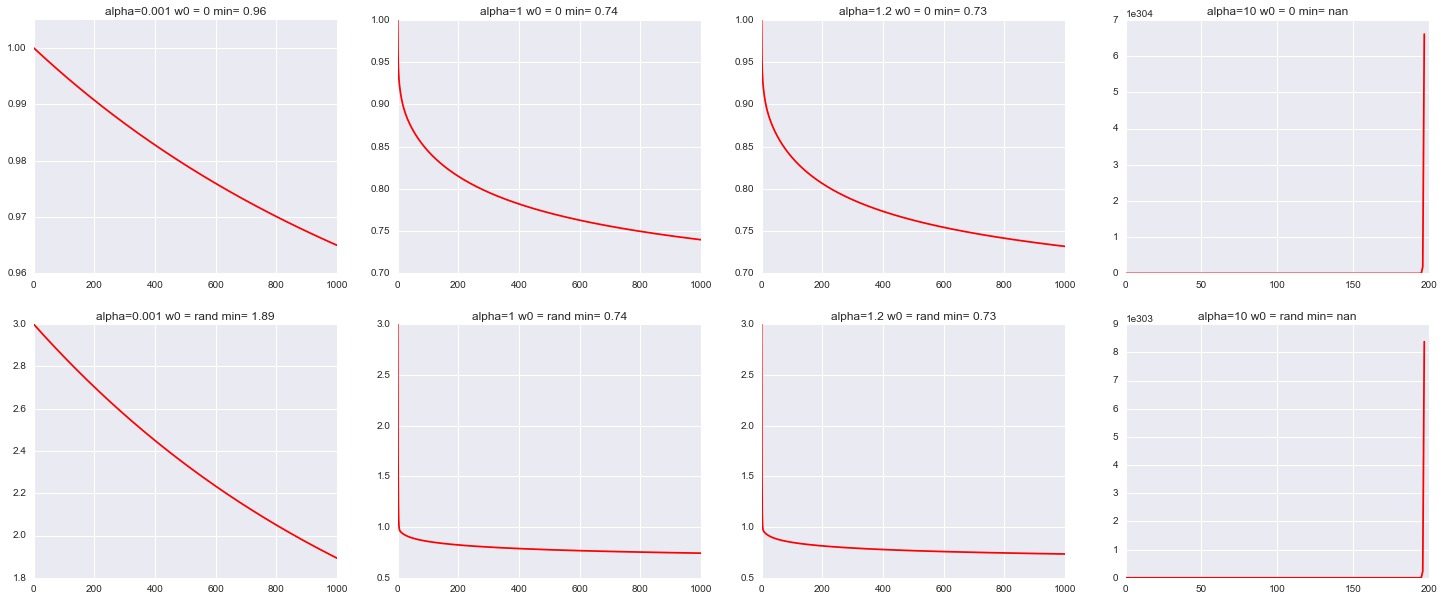

In [1579]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 1, 1.2, 10, 0.001, 1, 1.2, 10]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = 0" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_train_2, y_train_2, w0rand , alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " w0 = rand" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__

Параметры, конечно, влияют на сходимость. 

Рассмотрим случай, когда веса инициализируются нулями (верхние графики), в этом случае при маленьких значениях альфа (0.001) алгоритм сходится очень медленно, для больших значений альфа (10) алгоритм моментально расходится (если посмотреть на значения функционала потерь, то он из единицы начинает сразу расти в бесконечность), то есть оптимальный параметр скорости обучения альфа где-то в окрестности 1.5-2.   

Рассмотрим случай, когда веса инициализируются случайными величинами, взятыми из равномерного на [0,1] распределения (нижние графики). Поведение алгоритма при различных параметрах альфа такое же, как и в первом случае. Однако стоит отметить, что такая инициализация изменяет схождение алгоритма. Для альфа около 1 алгоритм также сходится примерно к тому же значению функционала потерь к 1000-ой итерации (что и с нулевыми весами), хотя и начинает с большего значения. Для меньших альфа схождение существенно хуже, так как скорость сильно меньше и он не успевает сходиться к тому же уровню, что и алгоритм с нулевыми начальными весами. При больших альфа алгоритм также расходится. 

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

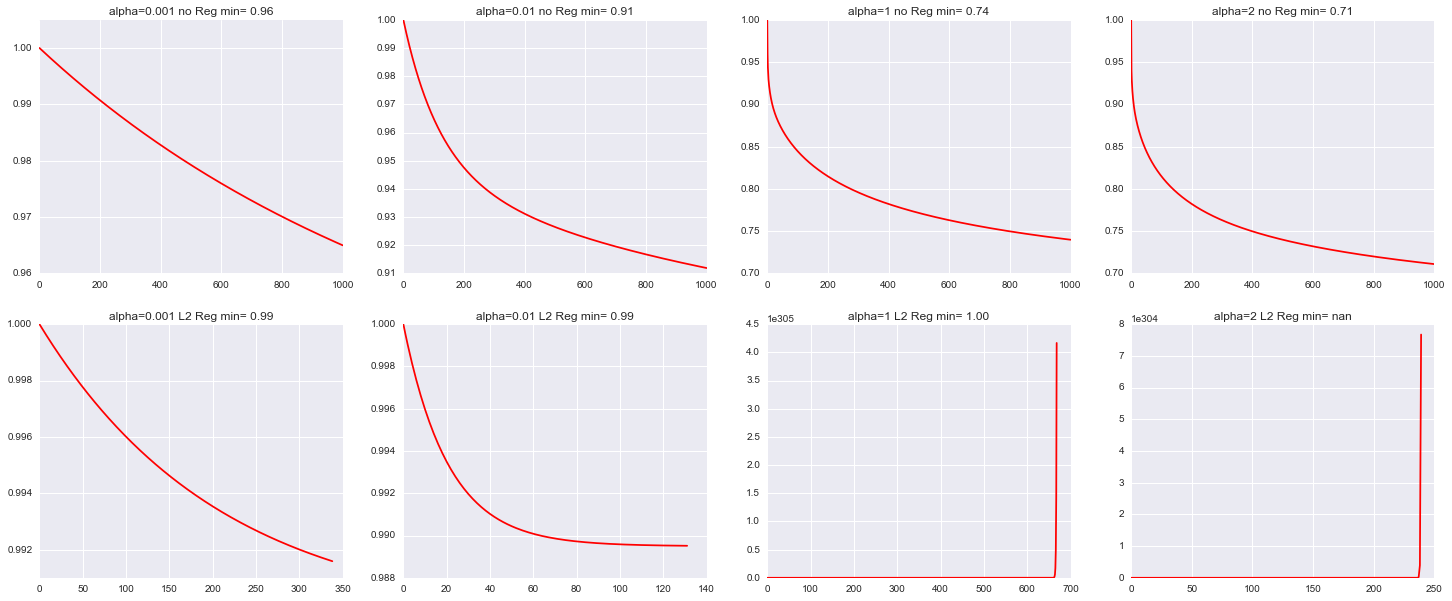

In [1580]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.001, 0.01, 1, 2, 0.001, 0.01, 1, 2]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]), alpha, 1000, 0.0001, False)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " no Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = grad_descent(X_train_2, y_train_2, np.zeros(X_train_2.shape[1]) , alpha, 1000, 0.0001, True)
        Lmin = "{:.2f}".format(np.min(Loss)) 
        ax.set_title('alpha=' + str(alpha) + " L2 Reg" + ' min= ' + Lmin)
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__

Наличие ргуляизации сильно влияет на сходимость. 

Во-первых, чтобы сойтись алгоритму с регуляризацией нужны меньшие значения альфа, иначе алгоритм быстро расходится.
Во-вторых, при одинаковых альфа, таких что оба алгоритма сходятся, алгоритм c регуляризацией сходится быстрее: при критерии останова = 0.0001 алгоритм с регуляризацией сходится за 130-340 интераций (в зависимости от выбора альфа), в то время, как алгоритм с регуляризацией еще до конца не сходится к 1000 шагу (но видно, что и не расходится). 

Возможно, регуляризация ограничнивает разброс значений коэффициентов, что ускоряет сходимость алгоритма

---------------------------

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [1496]:
def sgd(X, y, w0, step_size, max_iter=1000, eps=0.0001, is_reg=False):
    w_old, w_new = w0, w0
    X0 = X.iloc[0].reshape(1, -1)
    y0 = np.asarray(y.iloc[0]).reshape(1, -1)[0,:] 
    L = [get_reg_func(w_old, X0, y0)] if is_reg else [get_func(w_old, X0, y0)]
    iteration = 0
    while iteration < max_iter and np.linalg.norm(w_old-w_new)>eps if iteration>0 else True:
        #print('iter=', iteration, 'L=', L[iteration], 'norm=', np.linalg.norm(w_old-w_new))
        ind = numpy.random.randint(0, high=X.shape[0], size=1)[0]
        X1 = X.iloc[ind].reshape(1, -1)
        y1 = np.asarray(y.iloc[ind]).reshape(1, -1)[0,:] 
        w_old = w_new
        iteration += 1
        if is_reg:
            w_new = w_old - step_size*get_reg_grad(w_old, X1, y1)
            L.append(get_reg_func(w_new, X1, y1))
            
        else:
            w_new = w_old - step_size*get_grad(w_old, X1, y1)
            L.append(get_func(w_new, X1, y1))
    return w_new, L

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости.

In [1674]:
w0rand = numpy.random.rand(X_train.shape[1])

__Алгоритм с регуляризацией__

In [1684]:
w_opt_r, Loss_r = sgd(X_train, y_train, w0rand , 0.0003, 20000, 0.0001, True)

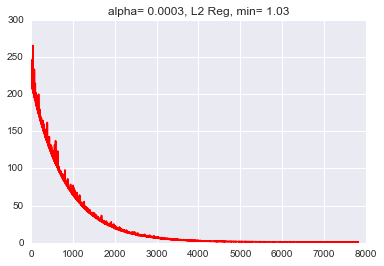

In [1688]:
plt.plot(range(len(Loss_r)), Loss_r, c="r")
Lmin = "{:.2f}".format(Loss_r[-1]) 
plt.title('alpha= 0.0003,'+ " L2 Reg," + ' min= ' + Lmin)

__Алгоритм без регуляризации__

In [1758]:
w_opt, Loss = sgd(X_train, y_train, w0rand , 0.008, 20000, 0.0001, False)

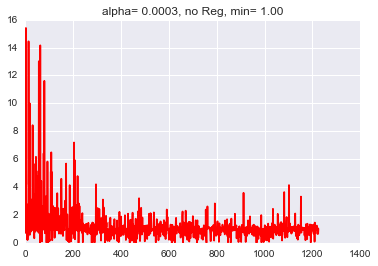

In [1759]:
plt.plot(range(len(Loss)), Loss, c="r")
Lmin = "{:.2f}".format(Loss[-1]) 
plt.title('alpha= 0.0003,'+ " no Reg," + ' min= ' + Lmin)

Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [1761]:
pred_sgd_noReg = make_pred(X_test, w_opt)
pred_sgd_L2Reg = make_pred(X_test, w_opt_r)

In [1776]:
print('-------No Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_func(w_opt, X_test, y_test), mse(y_test, pred_sgd_noReg),
                                                 r2_score(y_test, pred_sgd_noReg)))
print('\n-------L2 Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_reg_func(w_opt_r, X_test, y_test), mse(y_test, pred_sgd_L2Reg), 
                                                 r2_score(y_test, pred_sgd_L2Reg)))

-------No Regularization-------
MSPE 0.9859 
MSE 1461.6479 
R2  -0.0927 

-------L2 Regularization-------
MSPE 1.0038 
MSE 1455.2100 
R2  -0.0879 


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

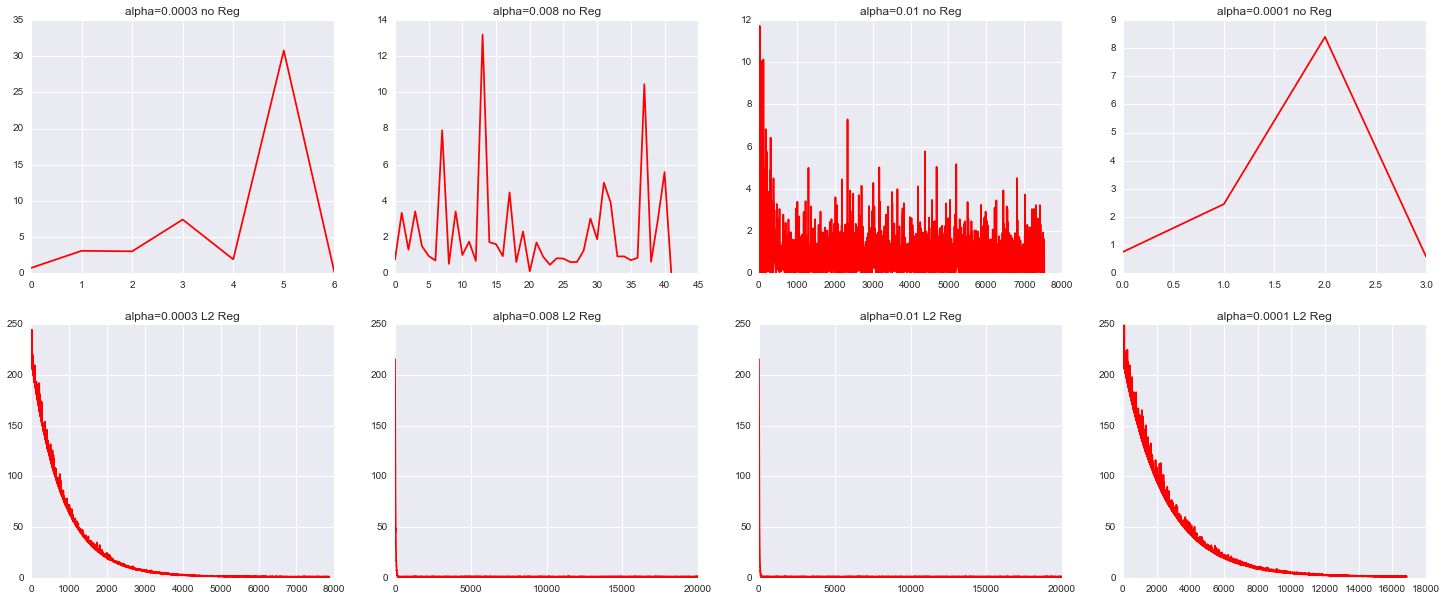

In [1768]:
fig = plt.figure(figsize=(25,10))
for i, alpha in enumerate([0.0003, 0.008, 0.01, 0.0001, 0.0003, 0.008, 0.01, 0.0001]):   
    ax = fig.add_subplot(2, 4, i+1)
    if i < 4:
        w_opt, Loss = sgd(X_train, y_train, w0rand, alpha, 20000, 0.0001, False)
        ax.set_title('alpha=' + str(alpha) + " no Reg")
        plt.plot(range(len(Loss)), Loss, c="r")
    else: 
        w_opt, Loss = sgd(X_train, y_train, w0rand , alpha, 20000, 0.0001, True)
        ax.set_title('alpha=' + str(alpha) + " L2 Reg")
        plt.plot(range(len(Loss)), Loss, c="r")

__Вывод:__
    
Как и в случае выше, мы видим, что регуляризация (нижний ряд) улучшает сходимость. Алгоритм без регуляризации ведет себя нестабильно и расходится при многих значениях альфа, чего не происходит с алгоритмом с резуляризацией.  

Как уже было сказано выше, возможно, регуляризация позволяет снижать колебания весов, тем самым алгоритм становится боле устойчивым в смысле сходимости. 

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [1775]:
LinReg_fin = LinearRegression()
LinReg_fin.fit(X_train, y_train)
w_linReg = LinReg_fin.coef_
pred_linReg = LinReg_fin.predict(X_test)

In [1771]:
w_linReg.shape

(624,)

In [1777]:
print('MSPE %0.4f \nR2  %0.4f' % (get_func(w_linReg, X_test, y_test), r2_score(y_test, pred_linReg)))

MSPE 46623002476017589682176.0000 
R2  -113579502904386704.0000


В задании просят сравнить результаты модели, обученной на полной тренировочной, а это было сделано в пункте __18__.

Результаты, полученные при обучении регрессии с функционалом $MSPE$ и его регуляризованным вариантом на полной обучающей выборке при помощи метода стохастического градиентного спуска (пункт 18):

In [1778]:
print('-------No Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_func(w_opt, X_test, y_test), mse(y_test, pred_sgd_noReg),
                                                 r2_score(y_test, pred_sgd_noReg)))
print('\n-------L2 Regularization-------')
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f ' %(get_reg_func(w_opt_r, X_test, y_test), mse(y_test, pred_sgd_L2Reg), 
                                                 r2_score(y_test, pred_sgd_L2Reg)))

-------No Regularization-------
MSPE 0.9859 
MSE 1461.6479 
R2  -0.0927 

-------L2 Regularization-------
MSPE 1.0038 
MSE 1455.2100 
R2  -0.0879 


Результаты простой линейной регрессии, обученной по полной обучающей выборке с функционалом $MSE$ и подсчитаным для нее $MSPE$ (пункт 20):

In [1779]:
print('MSPE %0.4f \nMSE %0.4f \nR2  %0.4f' % (get_func(w_linReg, X_test, y_test), mse(y_test, pred_linReg), 
                                              r2_score(y_test, pred_linReg)))

MSPE 46623002476017589682176.0000 
MSE 151931775920007806976.0000 
R2  -113579502904386704.0000


__Вывод:__

Как мы уже видели ранее, простая линейная регрессия с функционалом $MSE$ характеризуется проблемой переобучения, то есть показывает очень плохой результат на тестовой выборке, хуже чем модель с константой. 

Если же сравнить её результаты с результатами регрессии с функционалом $MSPE$, то можно увидеть, что и $MSE$ и $MSPE$ на тестовой выборке для модели, обученной градиентным спуском с функционалом $MSPE$ в тысячи раз меньше, чем у обычной регрессии. При этом $R^2$ хоть и отрицательный, но он очень близок к 0, тогда как в обычной регрессии (с функционалом $MSE$) он сильно отрицательный. 

Если посмотреть на получившиеся коэффициенты в двух моделях (ниже), то можно заметить, что в регрессии с функционалом $MSE$ явно наблюдается симптом переобучения - экстремальные коэффициенты, в то время как в регрессии с функционалом $MSPE$ коэффициенты стянуты к 0 (даже без регуляризации), можно предположить, что функционал $MSPE$ помогает бороться с переобучением в данном случае. 

Коэффициенты в регрессии с функционалом $MSE$:

In [1780]:
LinReg_fin.coef_

array([  3.42854184e-01,   2.02235049e-01,   5.62912377e-01,
         1.08109055e+00,  -1.06756489e+00,   3.66834140e+00,
         5.02838942e-01,   2.09204785e+00,   1.60698039e-01,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,   1.61501067e+12,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349246e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,  -6.07349247e+10,  -6.07349247e+10,
        -6.07349247e+10,

Коэффициенты в регрессии с функционалом $MSPE$ - без регуляризации:

In [1781]:
w_opt

array([  9.82185648e-03,   1.17192857e-02,   5.13242855e-03,
         7.99127888e-04,  -8.28847981e-03,   2.59853545e-02,
         2.09817712e-02,   1.77895140e-02,   1.52330432e-02,
         1.26582452e-02,   1.11653679e-03,   1.23882019e-03,
         2.86092407e-02,   3.26394436e-03,   2.29473549e-02,
         1.79605201e-02,   3.22511962e-02,   2.81296347e-02,
         1.16559313e-03,   1.13052970e-02,   3.40276747e-02,
         2.14037045e-02,   1.21635623e-02,   1.24733544e-02,
         2.29427519e-02,   2.10506524e-02,   1.88082901e-02,
         9.87805991e-03,   7.93689493e-03,   8.70807597e-04,
         3.92519844e-03,   1.13705896e-02,   2.91192372e-02,
         2.65643397e-02,   4.24275038e-03,   8.75241605e-03,
         2.00024554e-02,   2.24733720e-03,   1.33227848e-02,
         1.41675541e-02,   8.66814279e-04,   3.00058189e-02,
         4.60032121e-04,   9.23236891e-03,   2.96777722e-02,
         1.55741159e-02,   3.25384575e-02,   1.06970517e-02,
         2.16928236e-02,

Коэффициенты в регрессии с функционалом $MSPE$ - с регуляризацией:

In [1782]:
w_opt_r

array([  4.23675034e-03,  -7.20513573e-03,   1.33468061e-02,
        -7.30470944e-03,  -1.57825264e-02,   2.94790197e-02,
         5.55553938e-03,   2.65954028e-02,  -5.29903563e-04,
         3.26658209e-03,   3.50971460e-04,  -7.18207155e-05,
         7.62733224e-03,   8.69763182e-04,   6.04429911e-03,
         4.29043004e-03,   8.59561326e-03,   7.49141650e-03,
         3.13710208e-04,   2.83783591e-03,   9.05432256e-03,
         5.70357584e-03,   3.45420870e-03,   2.74896645e-03,
         5.93068346e-03,   5.63003093e-03,  -6.49653003e-04,
         2.48922308e-03,   1.91266472e-03,  -1.17220693e-04,
         9.76661843e-04,   2.98117257e-03,   8.65333136e-03,
         7.08228682e-03,   1.10493656e-03,   2.36533409e-03,
         5.26175366e-03,   1.46071804e-03,   3.46890817e-03,
         3.74225063e-03,   2.33884226e-04,   7.99583379e-03,
         8.85789532e-05,   1.71358139e-03,   7.42013561e-03,
         1.45893094e-03,   8.66786575e-03,   2.85411286e-03,
         5.79228267e-03,